# Stress level Detection

**Context:**

Stress is our body’s response to pressure. Many different situations or life events can cause stress. It is often triggered when we experience something new, unexpected or that threatens our sense of self, or when we feel we have little control over a situation.

**Description:**

So, on taking the parameters of data which includes Temperature, Humidity and Step count of a person which actually gives the stress level of a person we are using this data set of around 2000 records and then implementing our EDA and algorithms to predict the stress using these the three input parameters.

Explanation on the inputs:

Temprature -> If the temprature is high then the value of stress with respect to temprature is high.

Humidity -> If the Humidity is high then the value of stress with respect to humidity is high.

StepCount -> If the stepcount is high then the value of stress with respect to stepcount is high.




Importing Packages


In [ ]:
#Importing the libraries
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
# for visualizing
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluation metric
import itertools # advanced tools
import matplotlib.pyplot as plt
# for SVM algorithm
from sklearn.svm import SVC 
#for Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier
#for KNN algorith
from sklearn.neighbors import  KNeighborsClassifier
# for decision tree object
from sklearn.tree import DecisionTreeClassifier
#for Logistic regression
from sklearn.linear_model import LogisticRegression

Connecting collab to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing data from drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stresslevel.csv')

Defining the data on Inputs and Outputs

In [ ]:
X = df.drop('Stress Level', axis=1)
y = df['Stress Level']

Taking a look at the data

In [ ]:
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


Shape of the data

In [ ]:
df.shape

(2001, 4)

headers of the data

In [ ]:
print(df.columns.values[0:4])

['Humidity' 'Temperature' 'Step count' 'Stress Level']


Checking the null values

In [ ]:
print(df.isnull().sum())

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64


# Describing each stress level

In [ ]:
# Descriptive statistics of the least stressed level (0)

summary = (df[df['Stress Level'] == 0].describe().transpose().reset_index())
summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)
val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]
summary

,feature,count,mean,std,min,25%,50%,75%,max
0,Humidity,501.0,12.500,1.448,10.0,11.25,12.5,13.75,15.0
1,Temperature,501.0,81.500,1.448,79.0,80.25,81.5,82.75,84.0
2,Step count,501.0,42.934,26.199,0.0,20.00,41.0,65.00,90.0
3,Stress Level,501.0,0.000,0.000,0.0,0.00,0.0,0.00,0.0


In [ ]:
# Descriptive statistics of the middle stressed level (1)

summary = (df[df['Stress Level'] == 1].describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]
summary

,feature,count,mean,std,min,25%,50%,75%,max
0,Humidity,790.0,18.955,2.282,15.01,16.982,18.955,20.928,22.9
1,Temperature,790.0,87.955,2.282,84.01,85.982,87.955,89.928,91.9
2,Step count,790.0,78.130,37.677,0.00,48.000,88.000,110.000,129.0
3,Stress Level,790.0,1.000,0.000,1.00,1.000,1.000,1.000,1.0


In [ ]:
# Descriptive statistics of the most stressed level (2)

summary = (df[df['Stress Level'] == 2].describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]
summary

,feature,count,mean,std,min,25%,50%,75%,max
0,Humidity,710.0,26.455,2.051,22.91,24.682,26.455,28.228,30.0
1,Temperature,710.0,95.455,2.051,91.91,93.682,95.455,97.228,99.0
2,Step count,710.0,165.000,20.508,130.00,147.000,165.000,183.000,200.0
3,Stress Level,710.0,2.000,0.000,2.00,2.000,2.000,2.000,2.0


checking if there is any imbalance data

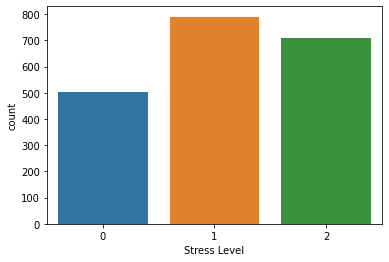

In [ ]:
sns.countplot(x="Stress Level", data =df)
plt.show()

In [ ]:
# We can see that data is not imbalance

Plot a pie chart for different stress levels


[790, 710, 501]


Text(0.5, 1.0, 'Stress Levels')

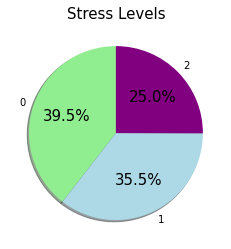

In [ ]:
stress_level = df["Stress Level"].value_counts().tolist()
labels = ['0','1', '2']
values = [stress_level[0], stress_level[1], stress_level[2]]
print(values)
colors = ['lightgreen', 'lightblue', 'purple']
fix, ax1 = plt.subplots()
# the autopct is to get the percentage values.
_, texts, autotexts = ax1.pie(values, labels=labels, colors=colors, startangle = 90,shadow=True, autopct='%1.1f%%')
list(map(lambda x:x.set_fontsize(15), autotexts))
ax1.set_title("Stress Levels", fontsize=15)

Uni Variate Analysis

In [ ]:
df.head

<bound method NDFrame.head of       Humidity  Temperature  Step count  Stress Level
0        21.33        90.33         123             1
1        21.41        90.41          93             1
2        27.12        96.12         196             2
3        27.64        96.64         177             2
4        10.87        79.87          87             0
...        ...          ...         ...           ...
1996     21.82        90.82          96             1
1997     10.45        79.45          45             0
1998     27.22        96.22         135             2
1999     12.46        81.46          64             0
2000     16.87        85.87          50             1

[2001 rows x 4 columns]>

In [ ]:
#Let's update our inputs and outputs
standard_scaler = StandardScaler()
X = df.drop('Stress Level', axis=1)
y = df['Stress Level']
#Scale features to improve the training ability of TSNE.
X_Scaled = standard_scaler.fit_transform(X.values)

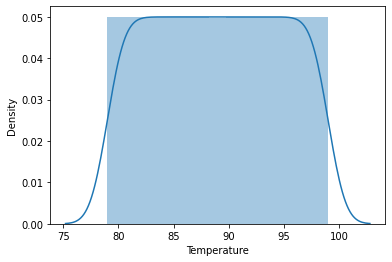

In [ ]:
#Distrtibution plot of one of the variables: Temperature
sns.distplot(df['Temperature']);

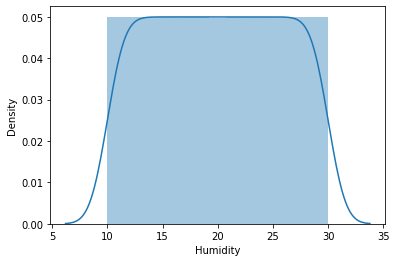

In [ ]:
#Distrtibution plot of one of the variables: Humidity
sns.distplot(df['Humidity']);

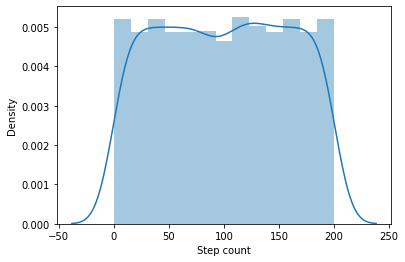

In [ ]:
#Distrtibution plot of one of the variables: Step count
sns.distplot(df['Step count']);

Bi variate analysis

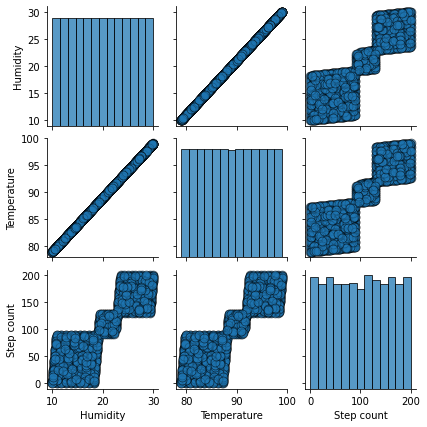

In [ ]:
#pairplot of some of the variables
plot = sns.pairplot(df[['Humidity','Temperature','Step count']],plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 2)

Plotting a 2-D graph in corrilation with Temprature and Step Count


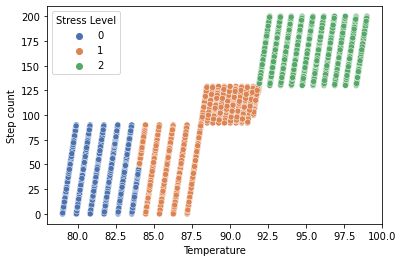

In [ ]:
sns.scatterplot(x='Temperature', y='Step count', data=df, hue='Stress Level', palette='deep')

Plotting a 2-D graph in corrilation with Humidity and Step count

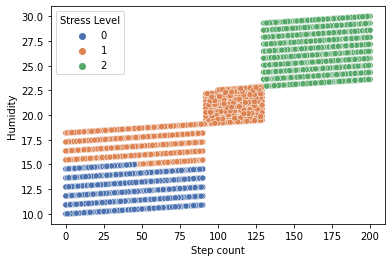

In [ ]:
sns.scatterplot(x='Step count', y='Humidity', data=df, hue='Stress Level', palette='deep')

Correlation of Variables with Stress Level

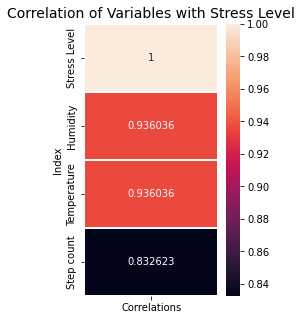

In [ ]:
corr = df.corrwith(df['Stress Level']).reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)

plt.figure(figsize=(3, 5))
fig = sns.heatmap(corr, annot=True, fmt="g", linewidths=0.4)

plt.title("Correlation of Variables with Stress Level", fontsize=14)
plt.show()

Correlation of variables with eachother


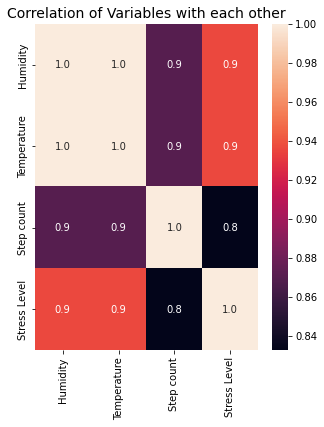

In [ ]:
plt.figure(figsize=(5,6))
plt.title("Correlation of Variables with each other", fontsize=14 )
sns.heatmap(df.corr(), annot = True, fmt = '.1f' )

Creating boxplot

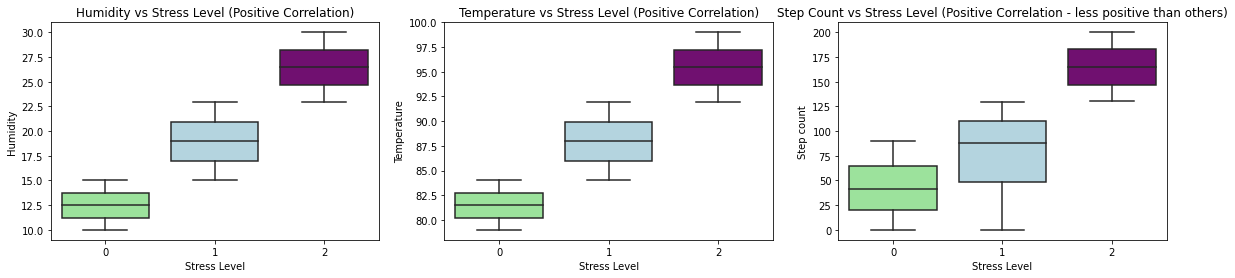

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

sns.boxplot(x="Stress Level", y="Humidity", data=df, palette=colors, ax=axes[0])
axes[0].set_title('Humidity vs Stress Level (Positive Correlation)')

sns.boxplot(x="Stress Level", y="Temperature", data=df, palette=colors, ax=axes[1])
axes[1].set_title('Temperature vs Stress Level (Positive Correlation)')

sns.boxplot(x="Stress Level", y="Step count", data=df, palette=colors, ax=axes[2])
axes[2].set_title('Step Count vs Stress Level (Positive Correlation - less positive than others)')

plt.show()

Plotting T-SNE

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2001 samples in 0.002s...
[t-SNE] Computed neighbors for 2001 samples in 0.065s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2001
[t-SNE] Computed conditional probabilities for sample 2000 / 2001
[t-SNE] Computed conditional probabilities for sample 2001 / 2001
[t-SNE] Mean sigma: 2.757360
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.331356
[t-SNE] KL divergence after 1000 iterations: 0.359171


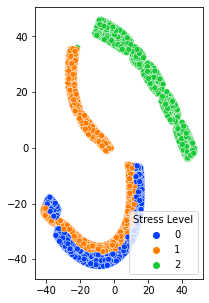

In [ ]:
from sklearn.manifold import TSNE
X_for_tsne = df.drop(['Stress Level'], axis=1)

# Commented out IPython magic to ensure Python compatibility.
# %time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

plt.figure(figsize=(3,5))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = df["Stress Level"],palette="bright")

Updating Inputs and Outputs with Standard scalar to check if there is any change

In [ ]:
standard_scaler = StandardScaler()
X = df.drop('Stress Level', axis=1)
y = df['Stress Level']
#Scale features to improve the training ability of TSNE.
X_Scaled = standard_scaler.fit_transform(X.values)

In [ ]:
# t-SNE

X_reduced_tsne = TSNE(n_components=2, random_state=2).fit_transform(X_Scaled)

t-SNE after StandardScaler


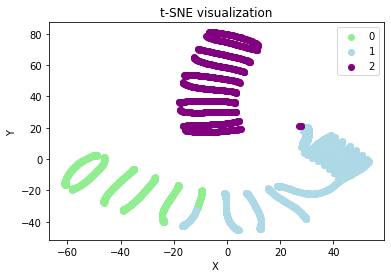

In [ ]:
color_map = {2:'purple', 1:'lightblue', 0:'lightgreen'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X_reduced_tsne[y==cl,0], 
                y=X_reduced_tsne[y==cl,1], 
                c=color_map[idx], 
                label=cl)
plt.xlabel('X ')
plt.ylabel('Y ')
plt.legend(loc='best')
plt.title('t-SNE visualization')
plt.show()

# Implementing Algo

Support vector Machine

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=0)

In [ ]:
#Without standard scalar
svm = SVC()
svm.fit(X_train, y_train)
svm_ypred = svm.predict(X_test)


In [ ]:
print('Accuracy score of the SVM model is :'+str(accuracy_score(y_test, svm_ypred)))

Accuracy score of the SVM model is :1.0


In [ ]:
#Classification Report before Standard Scaler
print(classification_report(y_test, svm_ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00       142

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



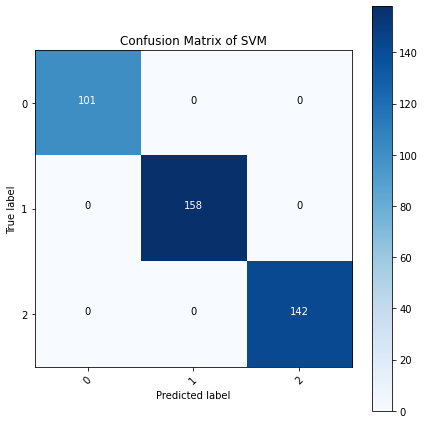

In [ ]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

svm_matrix = confusion_matrix(y_test, svm_ypred) # Support Vector Machine

plt.rcParams['figure.figsize'] = (6, 6)

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['0','1','2'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

In [ ]:
#SVM Prediction
print("Predicion of stress with user inputs for SVM :",svm.predict([[25,88,200]]))

Predicion of stress with user inputs for SVM : [2]


In [ ]:
#SVM With standard scaler

X_train= standard_scaler.fit_transform(X_train)
X_test=standard_scaler.transform(X_test)

svm = SVC()
svm.fit(X_train, y_train)
svm_ypred = svm.predict(X_test)

In [ ]:
print('Accuracy score of the SVM model with standard scalar is :'+str(accuracy_score(y_test, svm_ypred)))

Accuracy score of the SVM model with standard scalar is :0.9975062344139651


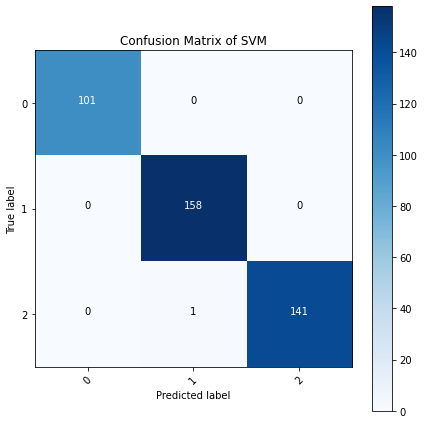

In [ ]:
svm_matrix = confusion_matrix(y_test, svm_ypred) # Support Vector Machine

plt.rcParams['figure.figsize'] = (6, 6)

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['0','1','2'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

In [ ]:
#Classification Report after Standard Scaler
print(classification_report(y_test, svm_ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       0.99      1.00      1.00       158
           2       1.00      0.99      1.00       142

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



Implementing random forest



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:

classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print('Accuracy score of the Ranfom Forest model is :'+str(accuracy_score(y_test, y_pred)))

Accuracy score of the Ranfom Forest model is :1.0


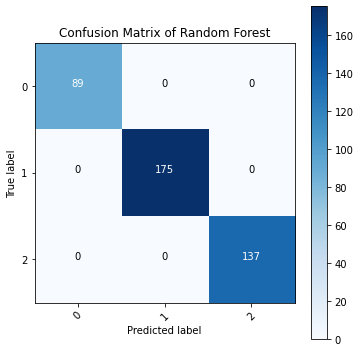

In [ ]:
#plot the confusion matrix
cm = confusion_matrix(y_test, y_pred) 
plt.rcParams['figure.figsize'] = (5, 5)
rnd_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1','2'], 
                                normalize = False, title = 'Random Forest')
plt.savefig('svm_cm_plot.png')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       175
           2       1.00      1.00      1.00       137

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



In [ ]:
#Random Forest Prediction
print("Predicion of stress with user inputs for Random Forest :",classifier.predict([[25,88,200]]))

Predicion of stress with user inputs for Random Forest : [2]


KNN algorithm 

In [ ]:
#KNN implementation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# k=1, KNN
knn = KNeighborsClassifier(n_neighbors=1)
#fit the model
knn.fit(X_train, y_train)
#print the score
print(knn.score(X_test,y_test))

1.0


In [ ]:
# checking the accuracy score for k-value
k_range = list(range(1,26))

In [ ]:
from sklearn import metrics
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))


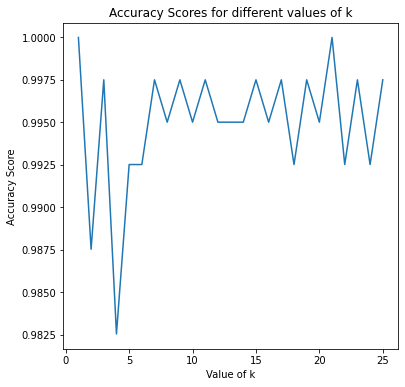

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

In [ ]:
#according to the above graph at n=13 we have a constant scoring
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('Accuracy score of the KNN model is :'+str(knn.score(X_test,y_test)))

Accuracy score of the KNN model is :0.9950124688279302


In [ ]:
y_pred = knn.predict(X_test)

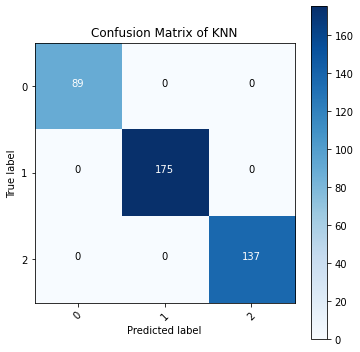

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       175
           2       1.00      1.00      1.00       137

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



In [ ]:
#plot the confusion matrix for this algorithm
cm = confusion_matrix(y_test, y_pred) # KNN
plt.rcParams['figure.figsize'] = (5, 5)
knn_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1','2'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
#KNN Prediction
print("Predicion of stress with user inputs for KNN :",knn.predict([[25,88,200]]))

Predicion of stress with user inputs for KNN : [2]


Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Defining the decision tree algorithm
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
# Testing
y_pred = dtree.predict(X_test)
print('Accuracy score of the Decision Tree model is :'+str(accuracy_score(y_test, y_pred)))

Accuracy score of the Decision Tree model is :1.0


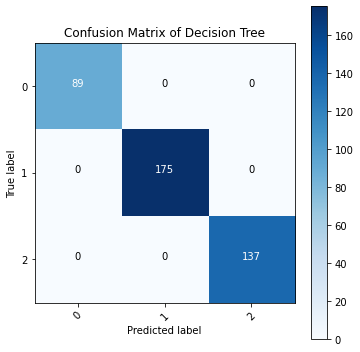

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       175
           2       1.00      1.00      1.00       137

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



In [ ]:
#plot the confusion matrix for DT
cm = confusion_matrix(y_test, y_pred) # 
plt.rcParams['figure.figsize'] = (5, 5)
tree_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1','2'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
#Decision Tree Prediction
print("Predicion of stress with user inputs for Decision Tree :",dtree.predict([[25,88,200]]))

Predicion of stress with user inputs for Decision Tree : [2]


In [ ]:
#create a copy of df to give as input for the feature names in plotting tree
target = df['Stress Level']
df1 = df.copy()
df1 = df1.drop('Stress Level', axis =1)

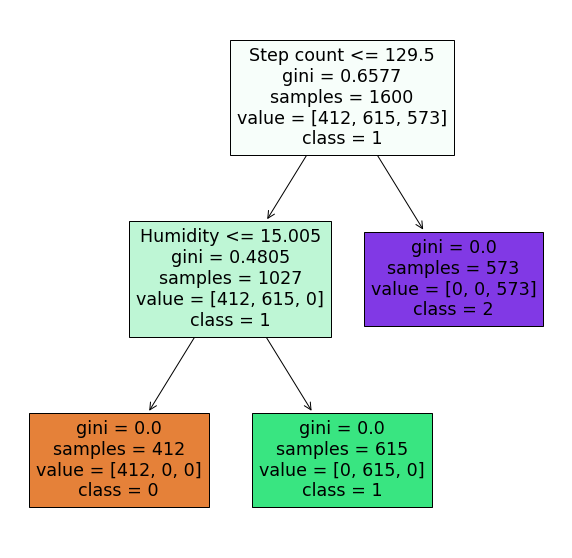

In [ ]:

plt.figure(figsize = (10,10))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["0", "1", "2"] , filled = True , precision = 4)

 Logistic Regression

In [ ]:
#Train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.20, random_state = 0)

In [ ]:
#apply Logistic regression on our data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.predict_proba(X_test)
y_pred=model.predict(X_test)
print('Accuracy score of the Logistic Regression model is :'+str(accuracy_score(y_test, y_pred)))

Accuracy score of the Logistic Regression model is :1.0


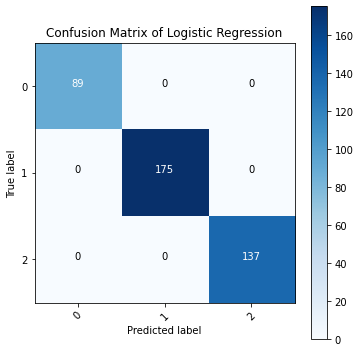

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       175
           2       1.00      1.00      1.00       137

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



In [ ]:
#plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred) 
plt.rcParams['figure.figsize'] = (5, 5)
log_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1','2'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('log_cm_plot.png')
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
#Logistic Regression Prediction
print("Predicion of stress with user inputs for Logistic Regression :",model.predict([[25,88,200]]))

Predicion of stress with user inputs for Logistic Regression : [2]
